# Project 4 - Predicting Cancer Type with Gene Expression Data

## Background

The goal of this project was to be able to predict the type of cancer based on gene analysis. 
The data used was provided through kaggle (https://www.kaggle.com/crawford/gene-expression/home).

## Loading and Cleaning Data

First, all 3 datasets needed to be loaded and cleaned. Two of the datasets contain all the features (different genes) and the third contains the cancer type of each patient, which will be what we are trying to predict.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#The first and second dataframe contain all the f
data1 = pd.read_csv('./dataset/data_set_ALL_AML_independent.csv')
data1.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [3]:
data2 = pd.read_csv('./dataset/data_set_ALL_AML_train.csv')
data2.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
#import the cancer type data at cancer_type (this will be refered to as the predictor since it is what is being predicted)
cancer_type = pd.read_csv('./dataset/actual.csv')
cancer_type.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


### Understanding the Data and Checking for Missing Value

In [5]:
# Using .shape on the cancer_type data, we can see that there are only 72 patients in this analysis.
# With a limited dataset like this, how the data is split will be very important. This could be an issue later on.
cancer_type.shape

(72, 2)

In [6]:
# Another possible struggle is that there are almost twice as many patients with ALL cancer, than with AML Cancer
cancer_type.cancer.value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [7]:
# Based on the above observation, we could also say, that anything that is more than 65% accurate is an improvement
# If we just guess that a person has ALL cancer, we are automatically 65% accurate.
47/72

0.6527777777777778

In [8]:
# By using the .info() function on all the datasets, we can see that there are no missing values.
# We can also see all the column names for each dataset.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 70 columns):
Gene Description         7129 non-null object
Gene Accession Number    7129 non-null object
39                       7129 non-null int64
call                     7129 non-null object
40                       7129 non-null int64
call.1                   7129 non-null object
42                       7129 non-null int64
call.2                   7129 non-null object
47                       7129 non-null int64
call.3                   7129 non-null object
48                       7129 non-null int64
call.4                   7129 non-null object
49                       7129 non-null int64
call.5                   7129 non-null object
41                       7129 non-null int64
call.6                   7129 non-null object
43                       7129 non-null int64
call.7                   7129 non-null object
44                       7129 non-null int64
call.8                   712

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129 entries, 0 to 7128
Data columns (total 78 columns):
Gene Description         7129 non-null object
Gene Accession Number    7129 non-null object
1                        7129 non-null int64
call                     7129 non-null object
2                        7129 non-null int64
call.1                   7129 non-null object
3                        7129 non-null int64
call.2                   7129 non-null object
4                        7129 non-null int64
call.3                   7129 non-null object
5                        7129 non-null int64
call.4                   7129 non-null object
6                        7129 non-null int64
call.5                   7129 non-null object
7                        7129 non-null int64
call.6                   7129 non-null object
8                        7129 non-null int64
call.7                   7129 non-null object
9                        7129 non-null int64
call.8                   712

In [10]:
cancer_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
patient    72 non-null int64
cancer     72 non-null object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
# Since the indexes for data1 and data2 are the same, we can combine the datasets.
#I chose to do this instead of keeping them seperated so I can do different splits on the data.
all_data = pd.merge(data1, data2, on='Gene Description')
all_data.head()

,Gene Description,Gene Accession Number_x,39,call_x,40,call.1_x,42,call.2_x,47,call.3_x,...,29,call.33_y,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [12]:
# At this point, I decided to remove the 'Gene Description', 'Gene Accession Number_x' and call_# columns from the all_data dataframe.
# There was no need to repeat Gene Description and Gene Accession Number (this occured due to combining the datasets)
# Since the remaining columns are the patients, all other columns needed to be removed for analysis
# For the same reason, The Gene Description column, was set to the index and the new dataframe can be seen below
all_data.drop(['Gene Accession Number_x','call_x', 'call.1_x', 'call.2_x','call.3_x','call.4_x','call.5_x','call.6_x','call.7_x','call.8_x','call.9_x','call.10_x','call.11_x','call.12_x','call.13_x','call.14_x','call.15_x','call.16_x','call.17_x','call.18_x','call.19_x','call.20_x','call.21_x','call.22_x', 'call.23_x','call.24_x','call.25_x', 'call.26_x', 'call.27_x', 'call.28_x', 'call.29_x', 'call.30_x', 'call.31_x', 'call.32_x', 'call.33_x','call_y','Gene Accession Number_y', 'call.1_y', 'call.2_y','call.3_y','call.4_y','call.5_y','call.6_y','call.7_y','call.8_y','call.9_y','call.10_y','call.11_y','call.12_y','call.13_y','call.14_y','call.15_y','call.16_y','call.17_y','call.18_y','call.19_y','call.20_y','call.21_y','call.22_y', 'call.23_y','call.24_y','call.25_y', 'call.26_y','call.27_y','call.33_y', 'call.34', 'call.35', 'call.36', 'call.37', 'call.28_y', 'call.29_y','call.30_y', 'call.31_y', 'call.32_y'], axis=1, inplace = True)
all_data.set_index('Gene Description', inplace = True)
all_data.head()

,39,40,42,47,48,49,41,43,44,45,...,35,36,37,38,28,29,30,31,32,33
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),-342,-87,22,-243,-130,-256,-62,86,-146,-187,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at (endogenous control),-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at (endogenous control),41,262,17,-163,-28,-410,-7,-141,170,312,...,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at (endogenous control),328,295,276,182,266,24,142,252,174,142,...,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at (endogenous control),-224,-226,-211,-289,-170,-535,-233,-201,-32,114,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [13]:
# Transposing the dataframe, makes the patients the index and the different genes the features we will be using in our analysis
# After transposing, a 'patient' column was added too allow us to combine the data with the cancer_type dataset
transposed_data = all_data.transpose()
transposed_data['patient']= transposed_data.index
transposed_data.head()

Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,533,-101,277,1023,67,214,-135,168,-70,39
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,80,-518,83,529,-295,352,-67,-33,-21,40
42,22,-153,17,276,-211,-250,55,-141,0,500,...,243,-189,413,399,16,558,24,1971,-42,42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,168,-180,174,277,6,81,2,510,-73,47
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,413,-146,233,643,51,450,-46,333,-19,48


In [14]:
# To combine the transposed_data with the cancer_type data, the 'patient' column for transposed_data was converted to an int
transposed_data['patient']=transposed_data['patient'].apply(int)
final_data = pd.merge(transposed_data, cancer_type, on= 'patient')
final_data.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,-101,277,1023,67,214,-135,168,-70,39,ALL
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,-518,83,529,-295,352,-67,-33,-21,40,ALL
2,22,-153,17,276,-211,-250,55,-141,0,500,...,-189,413,399,16,558,24,1971,-42,42,ALL
3,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,-180,174,277,6,81,2,510,-73,47,ALL
4,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,-146,233,643,51,450,-46,333,-19,48,ALL


In [15]:
# the cancer (predictor) column needs to be integers, not strings, in order to do analysis
final_data2 = final_data.replace(['ALL','AML'],[0,1])
final_data2.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,-101,277,1023,67,214,-135,168,-70,39,0
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,-518,83,529,-295,352,-67,-33,-21,40,0
2,22,-153,17,276,-211,-250,55,-141,0,500,...,-189,413,399,16,558,24,1971,-42,42,0
3,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,-180,174,277,6,81,2,510,-73,47,0
4,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,-146,233,643,51,450,-46,333,-19,48,0


## Initial Analysis

Initial analysis of the dataset allowed me to decide what type of model to use. Due to the number of features (8365), a heatmap is extremely difficult to view, so a different method had to be found.

In [16]:
import seaborn as sns

In [17]:
# Instead of a heatmap, creating a correlation matrix and sorting it by the values in the cancer 
# column, allows easy viewing of the most correlated values.
corr = final_data2.corr()
corr.sort_values(by = ['cancer'])

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer
Transcriptional activator hSNF2b,-0.178028,-0.021946,-0.148294,-0.094799,0.066998,-0.017365,0.094324,0.111668,-0.069180,0.073981,...,0.197340,0.196152,0.312979,0.101658,0.275758,-0.107443,-0.208714,0.085589,-0.261902,-0.637117
TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47),-0.090621,0.149666,-0.050817,-0.108450,0.003976,-0.034239,0.161046,0.134954,-0.133044,0.169717,...,0.175081,0.281333,0.121849,0.031351,0.117434,-0.030984,-0.063568,-0.039215,-0.227568,-0.631568
PROTEASOME IOTA CHAIN,0.048150,0.172637,-0.017046,-0.060119,0.192576,0.116247,0.219634,0.267978,-0.230527,0.034318,...,0.269656,0.192316,0.171121,0.026902,0.121914,0.021590,-0.269080,-0.053426,-0.334648,-0.625556
MYL1 Myosin light chain (alkali),0.115230,0.158566,0.012580,-0.076848,0.266091,0.232565,0.172979,0.345848,-0.310166,0.102837,...,0.347814,0.152694,0.081063,0.037359,0.095288,0.010404,-0.268899,-0.023586,-0.367155,-0.617826
CCND3 Cyclin D3,0.041156,0.193505,0.058566,-0.212001,0.244186,0.193203,0.157273,0.345277,-0.309604,0.070883,...,0.264245,0.230787,0.076676,0.103485,0.085131,-0.070802,-0.217347,-0.074955,-0.218041,-0.617569
TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47),0.001833,0.039351,-0.014212,-0.128849,0.119503,0.154434,0.115476,0.246679,-0.274518,0.131661,...,0.217246,0.257064,0.018337,-0.051586,0.211566,-0.055422,-0.166086,-0.031443,-0.128523,-0.610968
MB-1 gene,-0.204978,0.018300,-0.035547,-0.232768,0.051897,0.013599,0.069461,0.122664,-0.115722,-0.046778,...,0.178889,0.098399,0.029783,-0.088086,0.225771,-0.292440,-0.202988,-0.181499,-0.076238,-0.595825
CD19 gene,0.076557,0.042328,0.076547,-0.184927,0.092931,0.022948,0.223083,0.088002,-0.024422,-0.136181,...,0.072457,0.013255,0.012767,-0.202871,0.321397,-0.148855,-0.199632,0.037101,-0.103364,-0.592210
SPTAN1 Spectrin; alpha; non-erythrocytic 1 (alpha-fodrin),0.085054,0.168121,0.033927,-0.015641,0.153290,0.018187,0.250327,0.111679,-0.146358,0.174398,...,0.207069,0.261721,0.259356,-0.080059,0.114687,-0.014223,-0.257457,0.022195,-0.316610,-0.585880
Macmarcks,-0.048727,0.042406,-0.046712,0.002222,0.012931,0.010713,0.207525,0.155867,-0.155253,0.190586,...,0.194415,0.361524,0.221669,-0.008790,-0.001308,0.014924,-0.214329,-0.004270,-0.238240,-0.578840


'Zyxin', 'PRG1 Proteoglycan 1; secretory granule', and 'CD33 CD33 antigen (differentiation antigen)' are the most positively correlated.

'Transcriptional activator hSNF2b', 'TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47)', 'PROTEASOME IOTA CHAIN' are the three with the strongest negative correlation to cancer.


C:\Users\t89fo\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


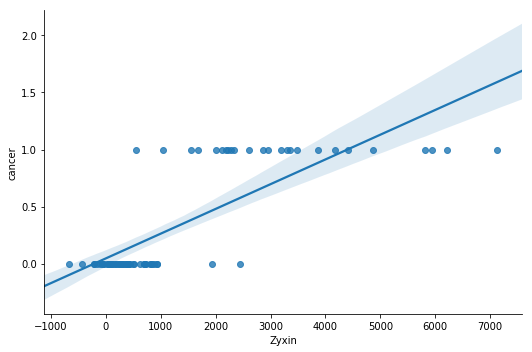

In [18]:
#starting with Zyxin, we can visually see that a Zyxin value of less than 1000 is likley ALL and higher values are likely AML. 
#A very similar relationship is seen for all three with a high positive correlation.
sns.lmplot(x='Zyxin', y="cancer", data=final_data2, aspect=1.5);

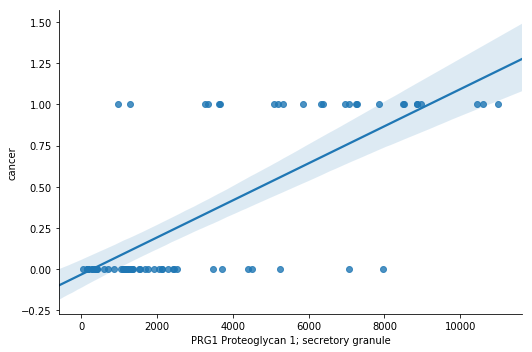

In [19]:
sns.lmplot(x='PRG1 Proteoglycan 1; secretory granule', y="cancer", data=final_data2, aspect=1.5);

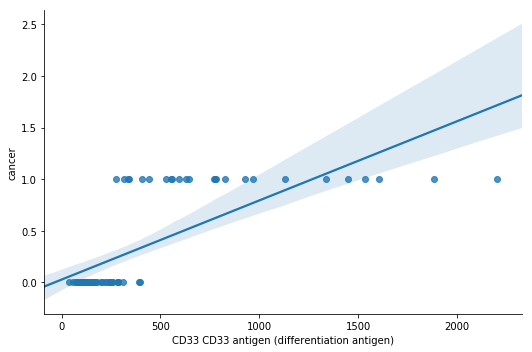

In [20]:
sns.lmplot(x='CD33 CD33 antigen (differentiation antigen)', y="cancer", data=final_data2, aspect=1.5);

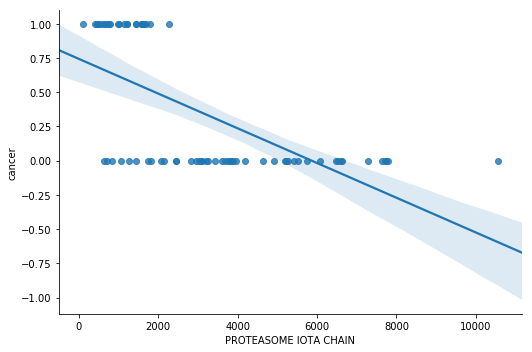

In [21]:
# The negative correlation features also showed similar results, with more groupings of the AML Cancer patients. 
sns.lmplot(x='PROTEASOME IOTA CHAIN', y="cancer", data=final_data2, aspect=1.5);

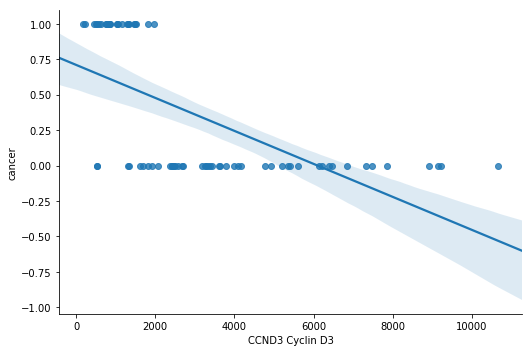

In [22]:
# I was unable to plot 'Transcriptional activator hSNF2b', 'TCF3 Transcription factor 3 (E2A immunoglobulin enhancer binding factors E12/E47)'.
# This is because there are multiple rows with these titles, so it is unable to differentiate between them.
#To make up for this, I chose 2 different genes, 'CCND3 Cyclin D3' and 'MYL1 Myosin light chain (alkali)'
sns.lmplot(x='CCND3 Cyclin D3', y="cancer", data=final_data2, aspect=1.5);

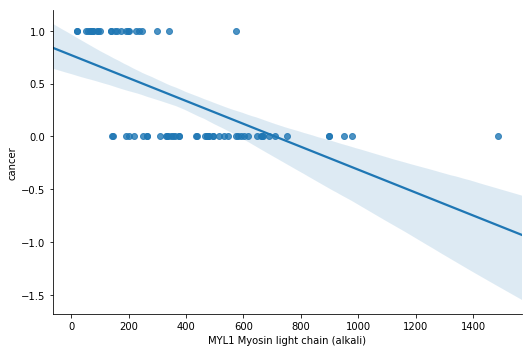

In [23]:
sns.lmplot(x='MYL1 Myosin light chain (alkali)', y="cancer", data=final_data2, aspect=1.5);

The above analysis suggested that Logistic Regression and a Decision Tree could be good models for this data.

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
# Set up the dataframe with just the most correlated features.

predicted_features = ['Zyxin', 'PRG1 Proteoglycan 1; secretory granule', 'CD33 CD33 antigen (differentiation antigen)','PROTEASOME IOTA CHAIN', 'CCND3 Cyclin D3','MYL1 Myosin light chain (alkali)' ]

X = final_data2[predicted_features]
y = final_data2['cancer']


In [26]:
# Train the model for the first logistic regression, with a 70-30 split
LR = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1,  test_size = 0.3)

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

C:\Users\t89fo\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
# Display the testing results with a confusion Matrix shows a perfect result.
confusion_matrix(y_test, y_pred)

array([[16,  0],
       [ 0,  6]], dtype=int64)

In [28]:
#Since the previous results are too good, a second logistic regression was run with a different random state, but same split.
LR = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123,  test_size = 0.3)

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

C:\Users\t89fo\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
#The confusion matrix now shows that the model is in fact not perfect, but very good.
confusion_matrix(y_test, y_pred)

array([[11,  1],
       [ 1,  9]], dtype=int64)

In [30]:
# get the accuracy of the previous model
20/22

0.9090909090909091

In [31]:
# A third regression was set up with a 90/10 split since there are so few patients.
LR = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123,  test_size = 0.1)

LR.fit(X_train,y_train)
pred = LR.predict(X_test)

C:\Users\t89fo\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# Even with a 90/10 split, the model shows a very positive prediction ability.
confusion_matrix(y_test, pred)

array([[2, 0],
       [1, 5]], dtype=int64)

In [33]:
#Accuracy of the third regression model
7/8

0.875

## K-Fold Cross Validation

Since the dataset is so small, K-Fold Cross Validation seems like a great way to use all the information that the data can provide.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [36]:
# I set this up to run through different folds (5-10) and return the scores for each fold.
for folds in range(5,11): 
    lr = LinearRegression() 
    scores = cross_val_score(lr, X, y, cv=folds) 
      
    print("{} Cross-validated scores: {}".format(folds, scores)) 
    
    
    # Make cross-validated predictions
    predictions = cross_val_predict(lr, X, y, cv=folds) 
    accuracy = metrics.r2_score(y, predictions) 
    print("{} Cross-Predicted Accuracy: {}".format(folds, accuracy)) 
    
    print("")

5 Cross-validated scores: [0.         0.65480033 0.33555062 0.         0.40361744]
5 Cross-Predicted Accuracy: 0.6530595863032682

6 Cross-validated scores: [ 0.          0.69911325 -0.36394606  0.          0.         -0.49578034]
6 Cross-Predicted Accuracy: 0.6450236850715725

7 Cross-validated scores: [0.         0.54782741 0.         0.65741572 0.         0.76869817
 0.        ]
7 Cross-Predicted Accuracy: 0.6718927393160612

8 Cross-validated scores: [ 0.          0.          0.77291369 -0.46043548  0.          0.
  0.79509378  0.        ]
8 Cross-Predicted Accuracy: 0.6549951912514056

9 Cross-validated scores: [0.         0.         0.6977504  0.         0.64592322 0.
 0.         0.82835244 0.        ]
9 Cross-Predicted Accuracy: 0.6976665496812995

10 Cross-validated scores: [ 0.          0.          0.67033409  0.         -0.06492815  0.
  0.          0.          0.79398104  0.        ]
10 Cross-Predicted Accuracy: 0.6558109409783298



## Decision Tree

In [39]:
from sklearn import tree
from sklearn import model_selection
import graphviz

X = transposed_data
y = final_data['cancer']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123,  test_size = 0.1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
clf.score(X_test, y_test)

0.875

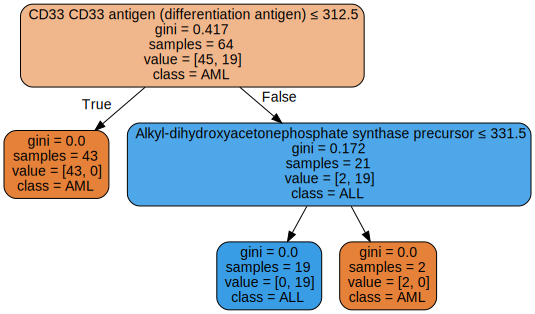

In [41]:

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=transposed_data.columns,class_names = ['AML', "ALL"],
                         filled=True, rounded=True,  
                         special_characters=True)

graphviz.Source(dot_data) 

## Conclusion